In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from utils import *

In [5]:
# importing the data
datafolder = '../../data/'
test = datafolder+'test_unseen_with_features.csv'
dev = datafolder+'dev_unseen_with_features.csv'
df_dev = pd.read_csv(dev, keep_default_na=False)
df_test = pd.read_csv(test, keep_default_na=False)

In [6]:
pd.options.display.max_colwidth = 100

In [14]:
df_test.columns

Index(['id', 'img', 'label', 'text', 'tokens', 'lemmas', 'upos', 'pos_fw_emo',
       'count', 'emotion_associations', 'sentiment_score', 'intent',
       'hatebert_vectors', 'hatebert_direct', 'svm_BoW_baseline_linear_C10',
       'baseline_svm_char_kernelC10', 'bert_base_cased_finetuned',
       'Advanced_svm_linear_100K_C10', 'ResNet_svm_rbf_kernel',
       'ResNet_svm_linear_kernelC10', 'GBensemble'],
      dtype='object')

In [397]:
# The following are false positives that are not hateful but were classified hateful. Most of them were seen hateful due to the text or the image being hateful.
false_positives_text_hateful = ['../../data/img/81926.png', '../../data/img/28916.png', '../../data/img/67281.png', '../../data/img/50714.png', '../../data/img/59781.png']

false_positives_img_hateful = ['../../data/img/76012.png', '../../data/img/06827.png', '../../data/img/98541.png' ]

false_positives_gold_label_wrong = ['../../data/img/65307.png', '../../data/img/94651.png', '../../data/img/10756.png']

false_negatives_gold_label_wrong = ['../../data/img/36927.png', '../../data/img/20314.png', '../../data/img/32795.png']

false_negatives_hateful_combo = ['../../data/img/20198.png', '../../data/img/01762.png', '../../data/img/71983.png']

false_negative_implicit = ['../../data/img/27096.png', '../../data/img/42867.png', '../../data/img/73129.png', '../../data/img/80634.png']

In [368]:
ambigious = ['../../data/img/62974.png', # fp
             '../../data/img/81605.png', # fp
            
            ]

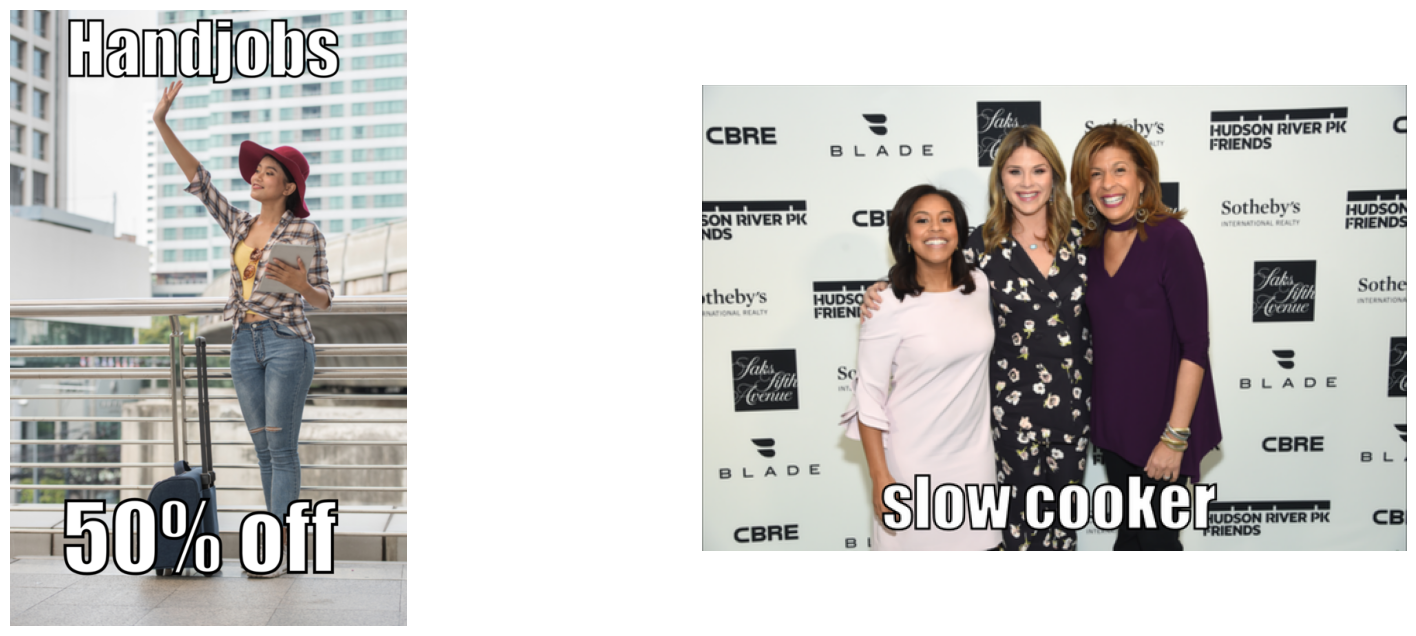

In [400]:
a = plot_images(ambigious)

In [399]:
a.savefig('plots/false_negatives_implicit_hate', bbox_inches='tight', pad_inches=0.1, dpi = 300)

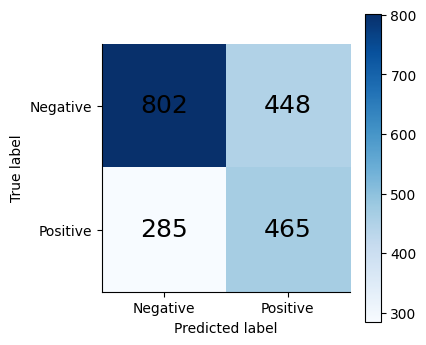

In [265]:
plot_confusion_matrix(df_test, 'label', 'GBensemble', 'test_unseen_confusion_matrix.png')

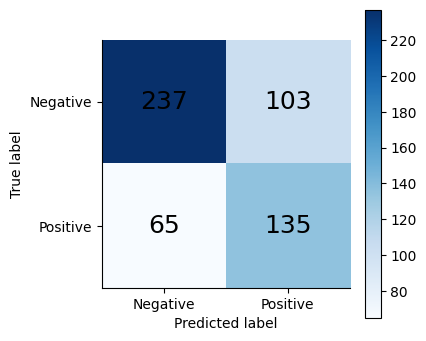

In [266]:
plot_confusion_matrix(df_dev, 'label', 'GBensemble',  'dev_unseen_confusion_matrix.png')

<AxesSubplot:ylabel='Frequency'>

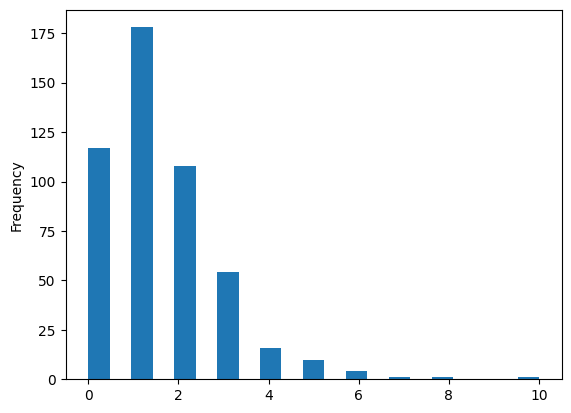

In [48]:
df_test['count'][df_test.label == 1].plot.hist(bins=21)

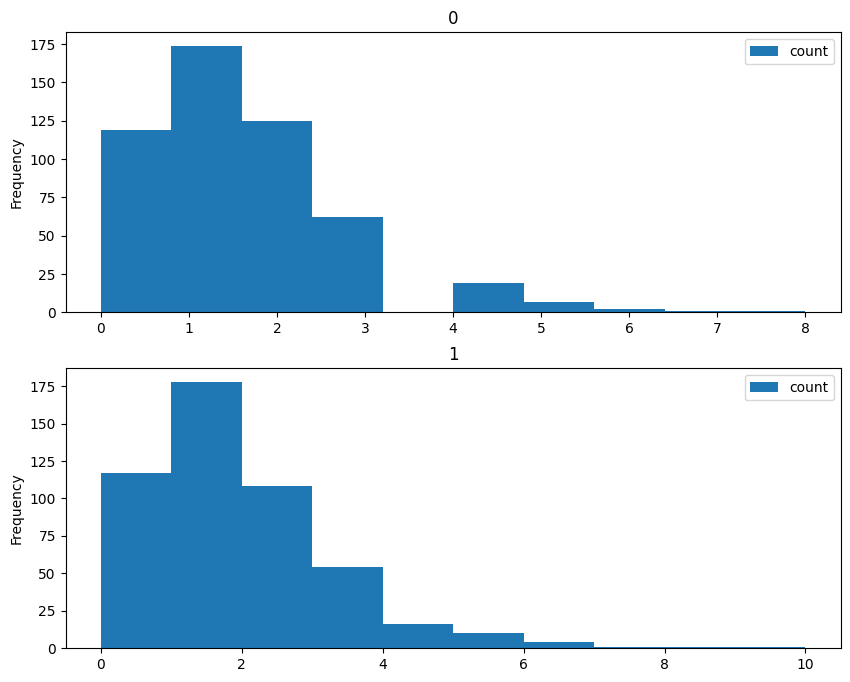

In [57]:
ax = df_test.plot.hist(column=["count"], by="label", figsize=(10, 8))

C:\Users\Hisha\AppData\Local\Temp\ipykernel_24964\3535492848.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_test.plot.hist(column=["sentiment_score"], by="label", ax=ax, yticks=np.arange(0, 300, 25), bins=10)


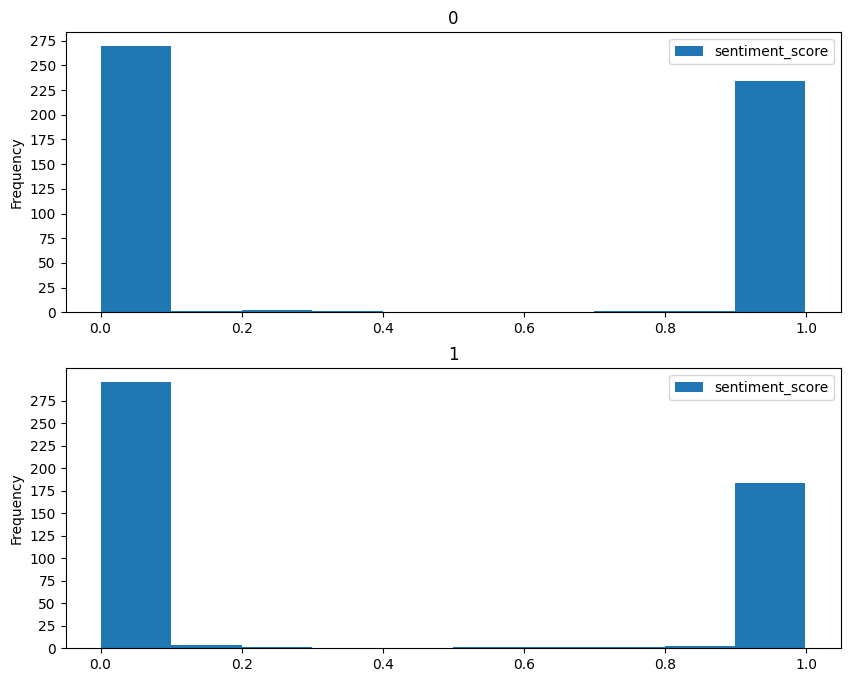

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

df_test.plot.hist(column=["sentiment_score"], by="label", ax=ax, yticks=np.arange(0, 300, 25), bins=10)

# ax2 = ax.twinx()
# ax2.set_ylim(ax.get_ylim())

plt.show()

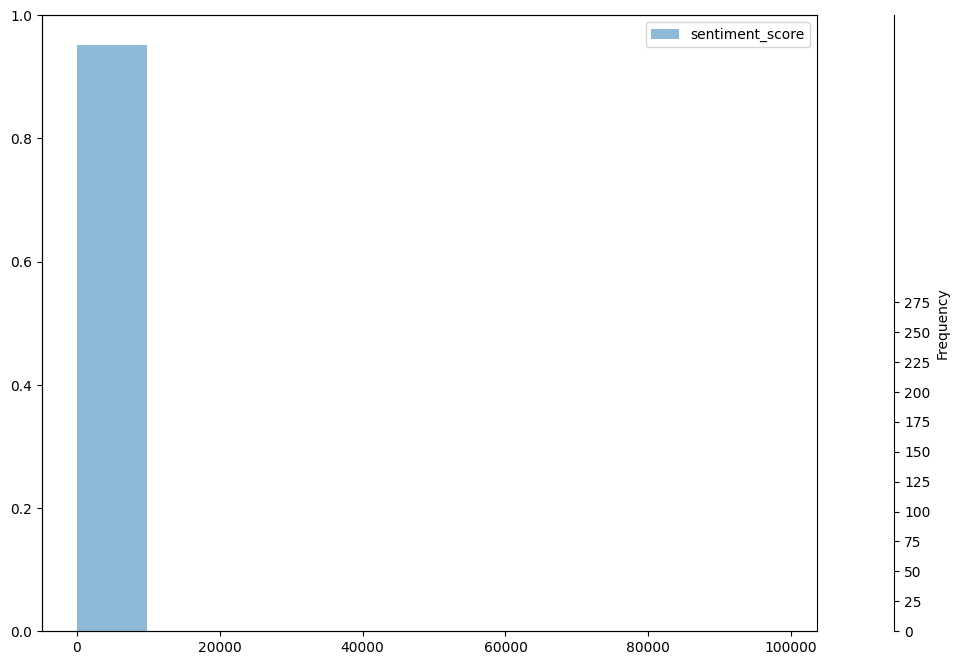

In [75]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

# plot histograms by label and create twin axes for each plot
# for i, label in enumerate([0, 1]):
ax1 = ax.twinx()
df_test[df_test["label"]==label].plot.hist(column=["sentiment_score"], ax=ax1, yticks=np.arange(0, 300, 25), bins=10, alpha=0.5)
ax1.spines["right"].set_position(("axes", 1 + 0.1*i))

# adjust positions of twin axes
# ax.spines["right"].set_visible(False)
# ax.spines["top"].set_visible(False)
# ax.spines["left"].set_position(("axes", -0.05))
# ax.yaxis.tick_left()
# ax.yaxis.set_label_position("left")
# ax.tick_params(axis="y", direction="out")

# add legends and labels
# plt.legend([0, 1])
# plt.xlabel("Sentiment Score")
# plt.ylabel("Frequency")
# plt.show()